In [1]:
import skvideo.io
import skvideo.datasets
import numpy as np

/home/user/.local/lib/python3.5/site-packages/skvideo/__init__.py:356: UserWarning: avconv/avprobe not found in path: 
  warnings.warn("avconv/avprobe not found in path: " + str(path), UserWarning)


In [2]:
videodata = skvideo.io.vread(skvideo.datasets.bigbuckbunny())

In [3]:
skvideo.io.vwrite("outputvideo.mp4", videodata)

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

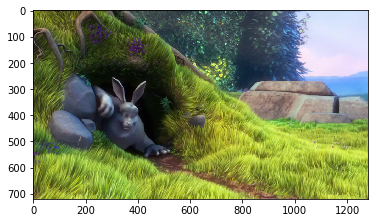

In [8]:
plt.imshow(videodata[0])

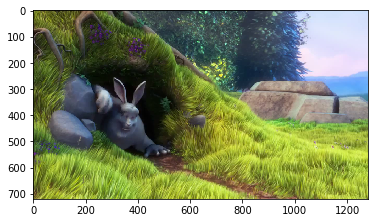

In [9]:
plt.imshow(videodata[1])

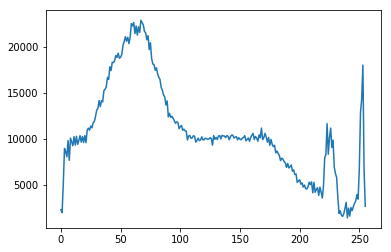

In [10]:
def hist(array):
    return np.histogram(array.ravel(), 256)[0]

plt.plot(hist(videodata[1]))

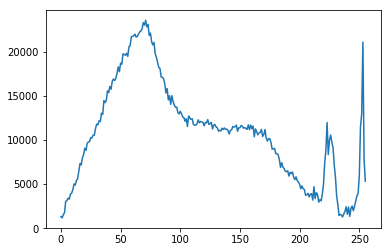

In [11]:
plt.plot(hist(videodata[-1]))

In [12]:
histograms = np.array([
    hist(videodata[i])
    for i in range(0, 132)
])

In [13]:
from sklearn.metrics import euclidean_distances

In [14]:
histograms_distances = euclidean_distances(histograms)

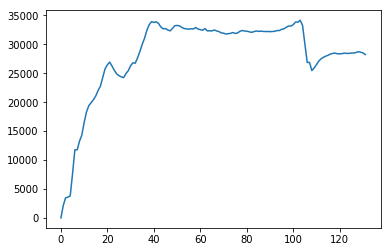

In [15]:
plt.plot(histograms_distances[0, :])

In [16]:
def hist_dissimilarity(hist1, hist2):
    shorter = min(np.linalg.norm(hist1), np.linalg.norm(hist2))
    diff_norm = np.linalg.norm(hist1 - hist2)
    return diff_norm / shorter

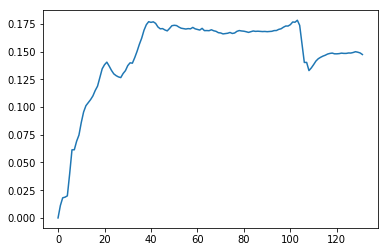

In [17]:
plt.plot([
    hist_dissimilarity(histograms[0], histograms[i])
    for i in range(0, 132)
])

In [18]:
import imagehash
import PIL

In [19]:
imagehash.phash(PIL.Image.fromarray(videodata[0])).hash.ravel()

array([ True, False,  True,  True,  True, False, False,  True, False,
       False,  True, False,  True,  True, False,  True,  True,  True,
        True, False, False,  True,  True, False,  True, False,  True,
        True, False, False,  True, False,  True,  True, False,  True,
       False, False,  True, False,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False,  True,  True, False, False,  True, False,  True], dtype=bool)

In [7]:
from funcs import phash, phash_dissimilarity, hist, hist_dissimilarity

In [21]:
phashes = np.array([
    phash(frame)
    for frame in videodata
])

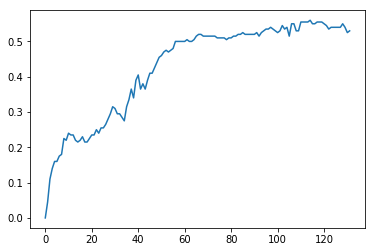

In [22]:
plt.plot([
    phash_dissimilarity(phashes[0], phashes[i])
    for i in range(0, 132)
])

In [3]:
from indexer import VideoIndexer
hist_index, phash_index = VideoIndexer("outputvideo.mp4", videodata).index()

In [4]:
from search import search

In [5]:
search_result = search(videodata[-1], phash_index, hist_index)
search_result

[('outputvideo.mp4', 131),
 ('outputvideo.mp4', 130),
 ('outputvideo.mp4', 129),
 ('outputvideo.mp4', 128),
 ('outputvideo.mp4', 125),
 ('outputvideo.mp4', 121),
 ('outputvideo.mp4', 118),
 ('outputvideo.mp4', 115),
 ('outputvideo.mp4', 113),
 ('outputvideo.mp4', 112),
 ('outputvideo.mp4', 111),
 ('outputvideo.mp4', 110),
 ('outputvideo.mp4', 108),
 ('outputvideo.mp4', 109),
 ('outputvideo.mp4', 106),
 ('outputvideo.mp4', 41),
 ('outputvideo.mp4', 40),
 ('outputvideo.mp4', 17),
 ('outputvideo.mp4', 16),
 ('outputvideo.mp4', 15),
 ('outputvideo.mp4', 18),
 ('outputvideo.mp4', 20),
 ('outputvideo.mp4', 39),
 ('outputvideo.mp4', 19),
 ('outputvideo.mp4', 42),
 ('outputvideo.mp4', 14),
 ('outputvideo.mp4', 38),
 ('outputvideo.mp4', 29),
 ('outputvideo.mp4', 37),
 ('outputvideo.mp4', 30),
 ('outputvideo.mp4', 36),
 ('outputvideo.mp4', 21),
 ('outputvideo.mp4', 22),
 ('outputvideo.mp4', 28),
 ('outputvideo.mp4', 31),
 ('outputvideo.mp4', 43),
 ('outputvideo.mp4', 33),
 ('outputvideo.mp4', 24

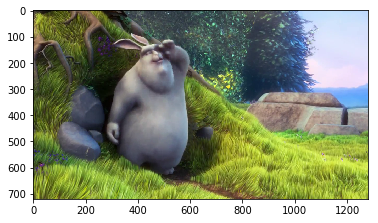

In [9]:
plt.imshow(videodata[-1])

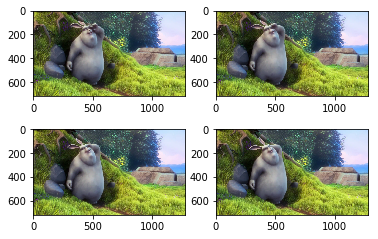

In [10]:
for i, index in enumerate([131, 130, 129, 128]):
    plt.subplot(2, 2, i + 1)
    plt.imshow(videodata[index])